# TM470 Project - Automating the Identification of UK Coarse Fish

In [1]:
import tensorflow as tf
import kaggle
import pandas as pd
import os
import numpy as np
import sklearn
from sklearn.model_selection import StratifiedShuffleSplit #scikit-learn.org
from sklearn.model_selection import train_test_split
import pathlib
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import xml.etree.ElementTree as et # https://docs.python.org/3/library/xml.etree.elementtree.html
from tensorflow.python.client import device_lib #for detection of devices
import glob as glob # Searches for certain files
# for model
from tensorflow.keras import Sequential, optimizers, metrics, layers
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

## Assign the dataset path

In [3]:
# Dataset address is C:\\Users\\Rob\\Dataset
datasetPath = (r'C:\Users\Rob\Desktop\TM470 test dataset')#(r'C:\\Users\\Rob\\Dataset')

In [4]:
# Assigning dataset path to pathlib
dat_dir = pathlib.Path(datasetPath).with_suffix('')
print(dat_dir)

C:\Users\Rob\Desktop\TM470 test dataset


In [4]:
# Number of images in dataset
image_count = len(list(dat_dir.glob('*/*.jpg'))) # is this how datasetPath should be?
print(image_count)

271


## Get image dimesions, class names and bound box information from XML files (using xml.etree.elementtree.html)

In [76]:
# Reading the information in the XML files and extracting img dimensions, class names and bound box dimensions
path = (dat_dir)
filelist = []
classNameList = list()#[]
boundBoxList = list()#[]
imgSizeList = list()#[]

for root, dirs, files in os.walk(path):
    for file in files:
        if not file.endswith('.xml'):
            continue
        filelist.append(os.path.join(root, file))
for file in filelist:
    root = et.parse(file).getroot() # get the root of the xml
# Get image dimensions
    for imgSize in root.findall('.//size'):
        #image_size = imgSize.find('size').text
        width = int(imgSize.find('./width').text)
        height = int(imgSize.find('./height').text)
        depth = int(imgSize.find('./depth').text)
        #data2 = [xmin,ymin,xmax,ymax])
        imgSizeList.append([width,height,depth]) 
# Get class names
    for className in root.findall('.//object'):
        class_name = className.find('name').text
        #data = np.array([class_name])
        classNameList.append(class_name)
# Get bounding box information
    for bndBox in root.findall('.//object'):
        bounding_box = bndBox.find('bndbox').text
        xmin = int(bndBox.find('./bndbox/xmin').text)
        ymin = int(bndBox.find('./bndbox/ymin').text)
        xmax = int(bndBox.find('./bndbox/xmax').text)
        ymax = int(bndBox.find('./bndbox/ymax').text)
        #data2 = [xmin,ymin,xmax,ymax])
        boundBoxList.append([xmin,ymin,xmax,ymax]) 

filepaths = list(dat_dir.glob(r'*/*.jpg'))

In [88]:
# print class names and bounding box info lists (list1 and list2)
#for i in range (5):
print(filepaths[0],classNameList[0],boundBoxList[0],imgSizeList[0])

C:\Users\Rob\Desktop\TM470 test dataset\Bream\00a7b0d4-8136-44f3-9e06-9972c1d42039-520mm.jpg Abramis brama [20, 20, 486, 193] [506, 213, 3]


## Create dataframe using filepaths, class names, bound boxes and images size

In [93]:
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
classNameList = pd.Series(classNameList, name='ClassName').astype(str)
boundBoxList = pd.Series(boundBoxList, name='Boundbox')#.astype(str)
imgSizeList = pd.Series(imgSizeList, name='Size')

dataframe = pd.concat([filepaths,classNameList, boundBoxList,imgSizeList], axis=1)#boundboxes

dataframe.shape

(271, 4)

In [94]:
dataframe.head()

,Filepath,ClassName,Boundbox,Size
0,C:\Users\Rob\Desktop\TM470 test dataset\Bream\...,Abramis brama,"[20, 20, 486, 193]","[506, 213, 3]"
1,C:\Users\Rob\Desktop\TM470 test dataset\Bream\...,Abramis brama,"[20, 20, 515, 187]","[535, 207, 3]"
2,C:\Users\Rob\Desktop\TM470 test dataset\Bream\...,Abramis brama,"[20, 20, 283, 916]","[303, 936, 3]"
3,C:\Users\Rob\Desktop\TM470 test dataset\Bream\...,Abramis brama,"[20, 20, 697, 244]","[717, 260, 3]"
4,C:\Users\Rob\Desktop\TM470 test dataset\Bream\...,Abramis brama,"[19, 20, 789, 400]","[800, 407, 3]"


In [100]:
dataframe["Filepath"][0]

'C:\\Users\\Rob\\Desktop\\TM470 test dataset\\Bream\\00a7b0d4-8136-44f3-9e06-9972c1d42039-520mm.jpg'

## Reading sample image 

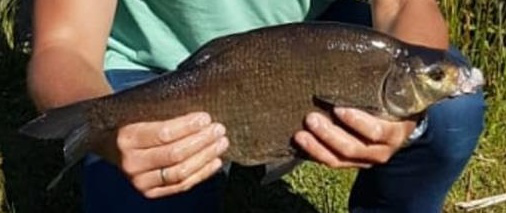

In [101]:
# https://www.kaggle.com/code/mtszkw/reading-sample-image-and-bounding-boxes-from-xml

sample_image = Image.open(dataframe["Filepath"][0])#(filepaths[0])
sample_image

# Adding bounding box to image to read

[20, 20, 486, 193]


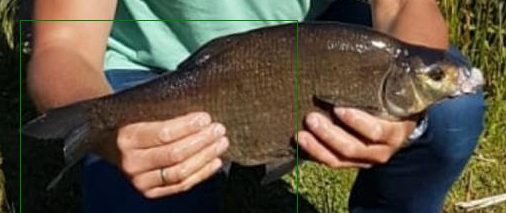

In [102]:
sample_image_boxed = sample_image.copy()

img_bbox = ImageDraw.Draw(sample_image_boxed)

#for i in range(5):
print(boundBoxList[0])
img_bbox.rectangle(bbox, outline="green") 
sample_image_boxed

#for bbox in boundBoxList:#boundBoxList
        #print(bbox)
        #img_bbox.rectangle(bbox, outline="green") 
#sample_image_boxed

In [ ]:
# From XML file for first image:
#<annotation>
#<size>
#<width>506</width>
#<height>213</height>
#<depth>3</depth>

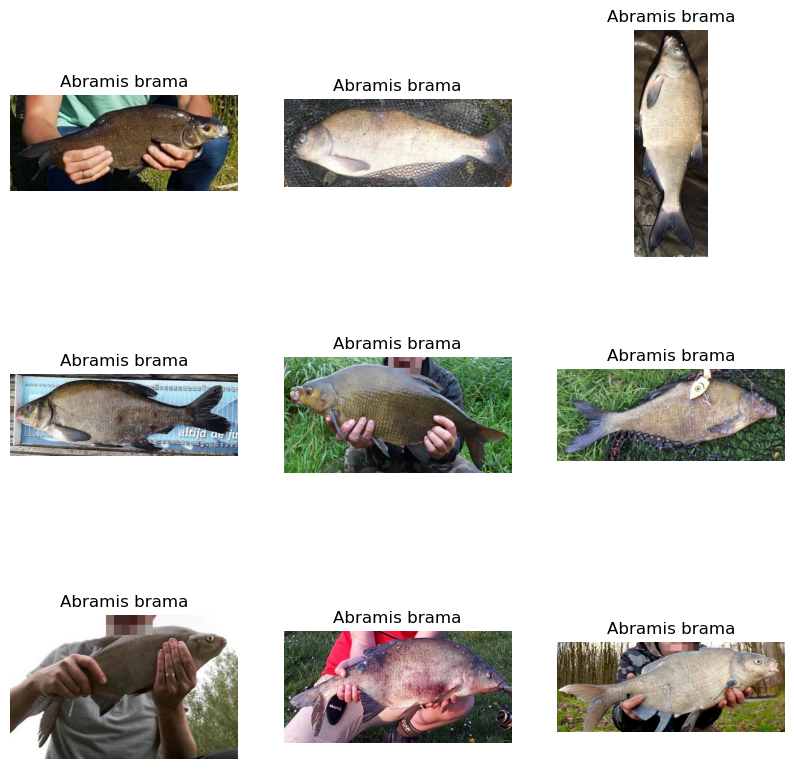

In [104]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(Image.open(dataframe["Filepath"][i]))#.astype("uint8")) #images[i].numpy().astype("uint8"))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title(classNameList[i])
    plt.axis("off")
plt.show()

## Create dataframe (using relative paths, class names and bound box details from XML)

In [ ]:
# Panda dataframe loc and iloc
dataframe.loc[:,"ClassName"]

In [ ]:
dataframe.dtypes

### Checking for and replacing NaN values in dataframe1

In [ ]:
# Are there any NaN in dataframe1?
#check_nan_in_dataframe = dataframe.isnull().values.any()
#print (check_nan_in_dataframe)

# Is there any Filepath values that are NaN?
#check_for_nan = dataframe['Filepath'].isnull().values.any()
#print (check_for_nan)

# How many count of NaN in Filepath
#count_nan = dataframe['Filepath'].isnull().sum()
#print ('Count of NaN: ' + str(count_nan))

# Replace all NaN values in Filepath column
#dataframe['Filepath'] = dataframe1['Filepath'].fillna(0)

# Are there any NaN values in dataframe1 after replacing them?
#check_nan_in_dataframe = dataframe1.isnull().values.any()
#print (check_nan_in_dataframe1)

In [ ]:
# Converting object types into numerical types

#dataframe['Filepath']=pd.Categorical(dataframe['Filepath'])
#dataframe['Filepath']=dataframe.Filepath.cat.codes


#dataframe['ClassName']=pd.Categorical(dataframe['ClassName'])
#dataframe['ClassName']=dataframe.ClassName.cat.codes

#dataframe['Boundbox']=pd.Categorical(dataframe['Boundbox'])
#dataframe['Boundbox']=dataframe.Boundbox.cat.codes

#dataframe.head()

## Use sklearn StratifiedShuffleSplit to split into test and train subsets

### From https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html

In [ ]:
# https://stackoverflow.com/questions/58461609/how-to-convert-pandas-dataframe-to-tensorflow-dataset
# Converting datframe into tensorflow dataset
#tensorDataset = tf.data.Dataset.from_tensor_slices(dataframe)#(dict(dataframe))#.to_dict() now instead of dict()

tensorflowDataset=tf.data.Dataset.from_tensor_slices(dict(dataframe))


In [ ]:
# How to convert dataframe into tensorflow dataset?
tensorflowDataset.take(1)

In [ ]:
# https://datascience.stackexchange.com/questions/45174/how-to-use-sklearn-train-test-split-to-stratify-data-for-multi-label-classificat
# Using sklearn train_test_split 

X = np.asarray(dataframe)#classNameList#dataframe#features/columns(has to be 2 dimensional, for array .reshape(-1,1))
y = np.asarray(dataframe['ClassName'])#classNameList#dataframe#labels (can be 1 dimensional)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

#print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
X_train[1],X_test[1],y_train[1],y_test[1]

In [ ]:
X_train.shape

In [ ]:
#X = dataframe# n_samples, n_features
#y = dataframe#n_samples or n_samples, n_labels

#X = np.asarray(dataframe)# n_samples, n_features
#y = np.asarray(dataframe['ClassName'])#n_samples or n_samples, n_labels

#sss = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=20)
#sss.get_n_splits(X, y)



#for i, (train_index, test_index) in enumerate (sss.split(X, y)):# in enumerate(sss.split(X, y))
    #print(f"Fold {i}:")
    #print(f"  Train: index={train_index}")
    #print(f"  Test:  index={test_index}")

In [ ]:
train_index.shape

In [ ]:
for i in range(9):
    print(X_train[i])


In [ ]:
sample_imgs, sample_labels = train_index.as_numpy_iterator().next()#.as_numpy_iterator()
sample_imgs.shape, sample_labels.shape

In [ ]:
# testing using sample label - to try debug final evaluation
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(sample_imgs[i].astype("uint8")) #images[i].numpy().astype("uint8"))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title(class_names[sample_labels[i]])
plt.show()

### test to see if i can connect dataset to shufflesplit

In [ ]:
# Image size
batch_size=16
img_height=180
img_width=180
image_size=(img_height,img_width,3)
num_classes = 30

In [ ]:
# Creating test dataset
test_dataset = tf.keras.utils.image_dataset_from_directory(
  dat_dir,
  #validation_split=0.1,
  #subset="testing",
  seed=125,
  image_size=(img_height,img_width),
  batch_size=batch_size)

In [ ]:
test_dataset

In [ ]:
# Useful information on Kaggle:
# https://www.kaggle.com/code/reighns/augmentations-data-cleaning-and-bounding-boxes (3 May 23)
# Hiding id behing jpg
#dataframe1["Filepath"] = dataframe1["Filepath"].apply(lambda x: str(x) + ".jpg")
#dataframe1

# Where to find the test data alternative way


In [ ]:
# my code
# Dataset address is C:\Users\Rob\Dataset
# datasetPath = (r'C:\Users\Rob\Dataset')
# dat_dir = pathlib.Path(datasetPath).with_suffix('')

# A way to split the data
# train_dir = os.path.join(dat_dir, 'train')
# validation_dir = os.path.join(dat_dir, 'validation')
# test_dir = os.path.join(dat_dir, 'test')

In [ ]:
# Assigning dataset path to pathlib
print(dat_dir)

In [ ]:
# Number of images in dataset and dataframe1
image_count = len(list(dat_dir.glob('*/*.jpg')))
image_count_df = len(dataframe)
print(image_count)
print(image_count_df)

# Creating the datasets (how to use dataframe1 created above?)

In [ ]:
# Image size
batch_size=16
img_height=180
img_width=180
image_size=(img_height,img_width,3)
num_classes = 30

In [ ]:
# Create the training dataset
train_dataset = tf.keras.utils.image_dataset_from_directory(
  dat_dir,
  validation_split=0.2,
  subset="training",
  seed=123,#none
  image_size=(img_height,img_width),
  batch_size=batch_size)

In [ ]:
# Create the validation dataset
val_dataset = tf.keras.utils.image_dataset_from_directory(
  dat_dir,
  validation_split=0.2,
  subset="validation",
  seed=124,
  image_size=(img_height,img_width),
  batch_size=batch_size)

In [ ]:
# Creating test dataset
test_dataset = tf.keras.utils.image_dataset_from_directory(
  dat_dir,
  #validation_split=0.1,
  #subset="testing",
  seed=125,
  image_size=(img_height,img_width),
  batch_size=batch_size)

In [ ]:
# Assign the class names
class_names = test_dataset.class_names
#class_names=list1
print(class_names) 

In [ ]:
# Next two cells for testing
sample_imgs, sample_labels = test_dataset.as_numpy_iterator().next()
sample_imgs.shape, sample_labels.shape

In [ ]:
# testing using sample label - to try debug final evaluation
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(sample_imgs[i].astype("uint8")) #images[i].numpy().astype("uint8"))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title(class_names[sample_labels[i]])
plt.show()

## My model (based on TM358 EMA model)

### Data augmentation

In [ ]:
# Creating the normalisation layer
norm_layer = layers.Normalization(input_shape=(image_size))
norm_layer.adapt(train_dataset.map(lambda x, y: x))

In [ ]:
# Creating an augmented subset
data_augmentation = tf.keras.Sequential([
layers.RandomRotation(0.2),
#layers.RandomZoom(height_factor=0.1),
layers.RandomFlip(mode='horizontal')
])

aug_train_dataset = train_dataset.map(lambda x, y: (data_augmentation(x, training=True), y),
num_parallel_calls=tf.data.AUTOTUNE)
aug_train_dataset = aug_train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

### Model creation

In [ ]:
# Define function to create model and compile
def build_model():
    model = Sequential([
        #norm_layer, # to normalise data - making training freeze
        Conv2D(filters=16, kernel_size=(3,3), padding='same',
        input_shape=image_size, activation='relu'),
        Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'),
        Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'),
        Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'),
        Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'),
        Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'),
        Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
        Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
        Conv2D(filters=64, kernel_size=(3,3), padding='valid', activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.5),
        Flatten(),
        Dense(1024, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(
        optimizer='adam',#(learning_rate=0.005),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
        )
    return model

In [ ]:
# Build the model using the build_model function
model=build_model()

In [ ]:
# Show a summary of the model
model.summary()

### Train the model

In [ ]:
# Train the model
#with tf.device("/device:GPU:0"):
hist=model.fit(
aug_train_dataset, 
validation_data=val_dataset, 
verbose=1,
epochs=5)

In [ ]:
# Plotting training loss and accuracy as well as validation loss and accuracy over the number of epochs
hist_dict = hist.history

# obtain the accuracy and loss of the training set and verification set in the returned
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(train_acc)+1)
plt.plot(epochs, train_acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend() # show legend 
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()
plt.figure()

plt.plot(epochs, train_loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

### Evaluating the model (based on code from TM358)

In [ ]:
model.evaluate(test_dataset, return_dict=True)

In [ ]:
test_predictions=model.predict(test_dataset)
test_predictions.shape

In [ ]:
predict_labels = np.argmax(test_predictions, axis=1)
predict_labels.shape

In [ ]:
actual_labels=np.array(list(test_dataset.unbatch().map(lambda x,y: y).as_numpy_iterator()))
#actual_labels=class_names
actual_labels=np.argmax(actual_labels, axis=0)
#actual_labels.shape
#actual_labels
print(actual_labels)

In [ ]:
#  actual_label = LABEL_TEXT[test_labels[i]]

In [ ]:
sample_imgs, sample_labels = test_dataset.as_numpy_iterator().next()
sample_imgs.shape, sample_labels.shape, sample_labels

In [ ]:
sample_predictions = model(sample_imgs)
# View the true and predicted labels of sample images
plt.figure(figsize=(15,15))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(sample_imgs[i].astype("uint8"))
    #plt.imshow(sample_imgs[i])
    p_class = np.argmax(sample_predictions[i])
    a_class = np.argmax(sample_labels[i])#sample
    #plt.title(f"P: {class_names[p_class]}\n(A: {class_names[a_class]})",
    plt.title(f"P: {class_names[p_class]}\n(A: {class_names[a_class]})",# class_names[a_class]
    color=("green" if p_class == a_class else "red"))
    plt.axis("off")
plt.show()